Partial dependence plots show the dependence between the target function [2] and a set of ‘target’ features, marginalizing over the values of all other features (the complement features). Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features (see feature_importances_).

This example shows how to obtain partial dependence plots from a GradientBoostingRegressor trained on the California housing dataset. The example is taken from [1].

The plot shows four one-way and one two-way partial dependence plots. The target variables for the one-way PDP are: median income (MedInc), avg. occupants per household (AvgOccup), median house age (HouseAge), and avg. rooms per household (AveRooms).

We can clearly see that the median house price shows a linear relationship with the median income (top left) and that the house price drops when the avg. occupants per household increases (top middle). The top right plot shows that the house age in a district does not have a strong influence on the (median) house price; so does the average rooms per household. The tick marks on the x-axis represent the deciles of the feature values in the training data.

Partial dependence plots with two target features enable us to visualize interactions among them. The two-way partial dependence plot shows the dependence of median house price on joint values of house age and avg. occupants per household. We can clearly see an interaction between the two features: For an avg. occupancy greater than two, the house price is nearly independent of the house age, whereas for values less than two there is a strong dependence on age.

[1]	T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.

[2]	For classification you can think of it as the regression score before the link function.

#### New to Plotly?
Plotly's Python library is free and open source! [Get started](https://plot.ly/python/getting-started/) by downloading the client and [reading the primer](https://plot.ly/python/getting-started/).
<br>You can set up Plotly to work in [online](https://plot.ly/python/getting-started/#initialization-for-online-plotting) or [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode, or in [jupyter notebooks](https://plot.ly/python/getting-started/#start-plotting-online).
<br>We also have a quick-reference [cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) (new!) to help you get started!

### Version

In [1]:
import sklearn
sklearn.__version__

'0.18.1'

### Imports

This tutorial imports [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split), [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor), [plot_partial_dependence](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.partial_dependence.plot_partial_dependence.html#sklearn.ensemble.partial_dependence.plot_partial_dependence), [partial_dependence](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.partial_dependence.partial_dependence.html#sklearn.ensemble.partial_dependence) and [fetch_california_housing](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing).

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

Automatically created module for IPython interactive environment


### Plot Partial Dependence

In [3]:
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

### Partial dependence of house value on nonlocation features for the California housing dataset

Training GBRT...
 done.
Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


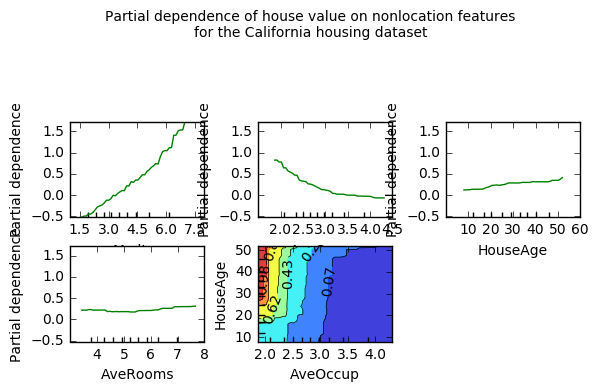

In [4]:
cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

print("Training GBRT...")
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)
print(" done.")

print('Convenience plot with ``partial_dependence_plots``')

features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
             'for the California housing dataset')
print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
plt.show()


### Partial dependence of house value on median age and average occupancy

In [5]:
surf = go.Surface(x=XX, y=YY, z=Z,
                  colorscale=matplotlib_to_plotly(plt.cm.BuPu, 10),
                 )

layout = go.Layout(title='Partial dependence of house value on median age and '
                          'average occupancy',
                   scene=dict(xaxis=dict(title=names[target_feature[0]],
                                         showticklabels=False),
                              yaxis=dict(title=names[target_feature[1]],
                                         showticklabels=False),
                              zaxis=dict(title='Partial dependence',
                                         showticklabels=False))
                   )
fig = go.Figure(data = [surf], layout=layout)

In [6]:
py.iplot(fig)

In [3]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install git+https://github.com/plotly/publisher.git --upgrade
import publisher
publisher.publish(
    'Partial Dependence.ipynb', 'scikit-learn/plot-partial-dependence/', 'Partial Dependence | plotly',
    ' ',
    title = 'Partial Dependence | plotly',
    name = 'Partial Dependence',
    has_thumbnail='true', thumbnail='thumbnail/partial-dependence.jpg', 
    language='scikit-learn', page_type='example_index',
    display_as='ensemble_methods', order=14,
    ipynb= '~Diksha_Gabha/3053')

  Cloning https://github.com/plotly/publisher.git to /tmp/pip-HVbTlP-build
  Found existing installation: publisher 0.10
    Uninstalling publisher-0.10:
      Successfully uninstalled publisher-0.10
  Running setup.py install for publisher ... - done
